# TensorFlow: Basics

In [3]:
#Examples found via Tensorflow.org
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
#Building MLM
#Sequential used for stacking layers w/ one input and ouput tensor
##A tensor is a multi-dimensional array with uniform type (dtype)
#Flatten, dense, and dropout are layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#Creates logits --> raw predictions
predictions = model(x_train[:1]).numpy()
predictions

array([[0.086658  , 0.13038017, 0.05841489, 0.15063106, 0.14576411,
        0.07435075, 0.07682712, 0.06672248, 0.1213959 , 0.08885551]],
      dtype=float32)

In [8]:
#tf.nn.softmax() function used to convert previous logits to probabilities
tf.nn.softmax(predictions).numpy()

array([[0.086658  , 0.13038017, 0.05841489, 0.15063106, 0.14576411,
        0.07435075, 0.07682712, 0.06672248, 0.1213959 , 0.08885551]],
      dtype=float32)

In [11]:
#loss fuctions provides scalar loss for example
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.5989614

In [13]:
#Configuration and compilation of model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
#Used to adjust model parameters
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8609 - loss: 0.4897
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9560 - loss: 0.1476
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9651 - loss: 0.1123
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9726 - loss: 0.0899
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0746


In [15]:
#Checks model performance
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9765 - loss: 0.0803


[0.08025676012039185, 0.9764999747276306]

## Basic Classification Using Keras

In [16]:
#Examples found via tensorflow.org
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Fashion MNIST dataset loaded from tensorflow
#train_images and train_labels --> train sets the model uses for learning
#test_images and test_labels --> test sets the model is tested against
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
#Images are mapped to single labels, names stored here for later use
##due to lack of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
#this shows there are 60k images in the training set, each represented as 28x28px
#this can be done for test as well (test_images.shape)
train_images.shape

(60000, 28, 28)

In [20]:
#shows the amount of labels in training set
#this can be done for test as well (len(test_labels))
len(train_labels)

60000

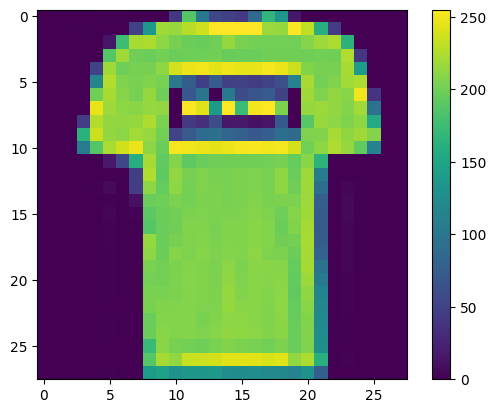

In [22]:
#preprocessing of data
#second image in the training set is used below
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
#values must be scaled to a range of 0 to 1 before use, so both sets divided by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

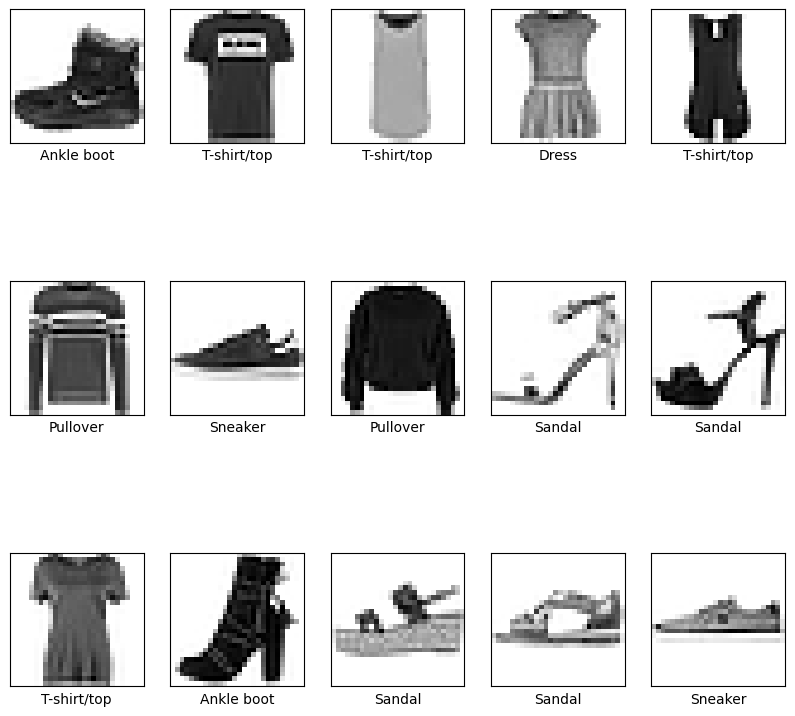

In [27]:
#verification of format
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the model

In [30]:
#Again sequential is used to link multiple layers
#Flatten transforms the format from a two-dimensional arry to a one
#Dense connects input features to neurons in the layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [31]:
#Compilation of the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
#Here the model is trained using fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7805 - loss: 0.6394
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8608 - loss: 0.3885
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8758 - loss: 0.3409
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8841 - loss: 0.3118
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8903 - loss: 0.2970
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8949 - loss: 0.2835
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9015 - loss: 0.2650
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9047 - loss: 0.2580
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9068 - loss: 0.2489
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9107 - loss: 0.2415


In [33]:
#Accuracy is evaluated
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8686 - loss: 0.3601

Test accuracy: 0.8686000108718872


In [34]:
#Predictions are then made (logits are converted to probabilities)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
#The code below defines functions to graph class predictions
#bar graph is used to show prediction labels for the image
#blue is used to indicate correctness with red as incorrect

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

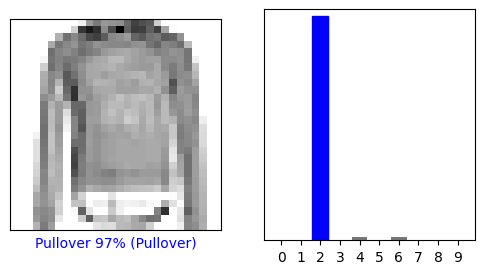

In [46]:
#Here is an example of one image and its prediction graph with a correct prediction
i = 16
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

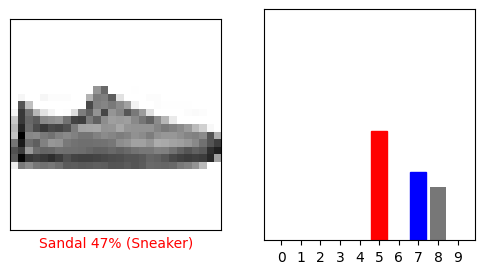

In [47]:
#Here is an example of a graph with a incorrect prediction
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()